# Loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import math
import plotly.graph_objs as go
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt
import pylab as pl

In [2]:
dt=pd.read_csv("D:/2015_16_Statewise_Secondary.csv")

# UNDERSTANDING THE DATASET

In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Columns: 630 entries, ac_year to enr12_py
dtypes: float64(98), int64(530), object(2)
memory usage: 172.4+ KB


# DATA PREPROCESSING

In [4]:
dt.head()

,ac_year,statcd,statname,area_sqkm,tot_population,urban_population,grwoth_rate,sexratio,sc_population,st_population,...,tchmed_nr,tchoth_nr,tchse_nr,tchnr_nr,enrc7_py,enrc8_py,enrc9_py,enrc10_py,enr11_py,enr12_py
0,2015-16,1,Jammu And Kashmir,222236,12548.93,20.05,23.71,883,7.4,11.9,...,0,0,0,0,199954,203537,192567,146066,138963,116187
1,2015-16,2,Himachal Pradesh,55673,6856.51,8.69,12.81,974,25.2,5.7,...,0,0,0,0,122101,122413,130258,135253,119932,98924
2,2015-16,3,Punjab,50362,27704.24,29.82,13.73,893,31.9,0.0,...,0,0,0,0,481982,473349,451412,426034,351639,342835
3,2015-16,4,Chandigarh,114,1054.69,76.66,17.10,818,18.9,0.0,...,0,0,0,0,21344,21321,21545,16708,20948,17943
4,2015-16,5,Uttarakhand,53483,10116.75,21.54,19.17,963,18.8,2.9,...,0,0,0,0,193393,193890,197590,200769,150799,162100


In [5]:
dt.columns

Index(['ac_year', 'statcd', 'statname', 'area_sqkm', 'tot_population',
       'urban_population', 'grwoth_rate', 'sexratio', 'sc_population',
       'st_population',
       ...
       'tchmed_nr', 'tchoth_nr', 'tchse_nr', 'tchnr_nr', 'enrc7_py',
       'enrc8_py', 'enrc9_py', 'enrc10_py', 'enr11_py', 'enr12_py'],
      dtype='object', length=630)

In [6]:
dt.dtypes

ac_year            object
statcd              int64
statname           object
area_sqkm           int64
tot_population    float64
                   ...   
enrc8_py            int64
enrc9_py            int64
enrc10_py           int64
enr11_py            int64
enr12_py            int64
Length: 630, dtype: object

In [7]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
statcd,35.0,18.000000,10.246951,1.00,9.500,18.00,26.500,35.00
area_sqkm,35.0,93921.142857,103754.389960,32.00,9367.500,53483.00,145449.000,342239.00
tot_population,35.0,34576.955429,44422.781183,64.43,1420.165,16753.24,60757.165,199581.48
urban_population,35.0,26.776571,16.450826,8.36,16.435,21.99,30.965,77.03
grwoth_rate,35.0,19.030857,11.021898,-0.47,13.830,18.65,22.465,55.50
...,...,...,...,...,...,...,...,...
enrc8_py,35.0,608767.885714,804026.775935,1202.00,28256.500,366552.00,844335.000,3692986.00
enrc9_py,35.0,564720.285714,732261.522556,1486.00,29863.500,397640.00,781815.000,3372729.00
enrc10_py,35.0,499958.514286,678792.422304,1459.00,21585.500,254503.00,727895.000,3331344.00
enr11_py,35.0,335056.257143,518456.311328,1026.00,17946.500,150799.00,414776.000,2700413.00


In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Columns: 630 entries, ac_year to enr12_py
dtypes: float64(98), int64(530), object(2)
memory usage: 172.4+ KB


In [9]:
dt.describe(include=['int','float'])

,statcd,area_sqkm,tot_population,urban_population,grwoth_rate,sexratio,sc_population,st_population,literacy_rate,male_literacy_rate,...,tchmed_nr,tchoth_nr,tchse_nr,tchnr_nr,enrc7_py,enrc8_py,enrc9_py,enrc10_py,enr11_py,enr12_py
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,...,35.000000,35.000000,35.0,35.000000,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01
mean,18.000000,93921.142857,34576.955429,26.776571,19.030857,929.285714,11.760000,22.940000,78.648857,85.271714,...,0.114286,0.028571,0.0,40.114286,6.237793e+05,6.087679e+05,5.647203e+05,4.999585e+05,3.350563e+05,3.173127e+05
std,10.246951,103754.389960,44422.781183,16.450826,11.021898,79.686360,8.670715,29.179648,8.121043,6.326527,...,0.676123,0.169031,0.0,162.586587,8.210042e+05,8.040268e+05,7.322615e+05,6.787924e+05,5.184563e+05,4.899483e+05
min,1.000000,32.000000,64.430000,8.360000,-0.470000,618.000000,0.000000,0.000000,63.820000,73.390000,...,0.000000,0.000000,0.0,0.000000,1.118000e+03,1.202000e+03,1.486000e+03,1.459000e+03,1.026000e+03,9.640000e+02
25%,9.500000,9367.500000,1420.165000,16.435000,13.830000,900.500000,3.150000,2.200000,72.110000,80.520000,...,0.000000,0.000000,0.0,0.000000,2.904550e+04,2.825650e+04,2.986350e+04,2.158550e+04,1.794650e+04,1.542650e+04
50%,18.000000,53483.000000,16753.240000,21.990000,18.650000,946.000000,12.800000,10.200000,79.310000,86.460000,...,0.000000,0.000000,0.0,0.000000,3.726150e+05,3.665520e+05,3.976400e+05,2.545030e+05,1.507990e+05,1.621000e+05
75%,26.500000,145449.000000,60757.165000,30.965000,22.465000,974.500000,17.800000,31.200000,86.305000,90.685000,...,0.000000,0.000000,0.0,0.000000,8.559955e+05,8.443350e+05,7.818150e+05,7.278950e+05,4.147760e+05,3.804115e+05
max,35.000000,342239.000000,199581.480000,77.030000,55.500000,1084.000000,31.900000,94.800000,93.910000,96.110000,...,4.000000,1.000000,0.0,889.000000,3.675032e+06,3.692986e+06,3.372729e+06,3.331344e+06,2.700413e+06,2.541247e+06


In [10]:
dt.isna().sum()

ac_year           0
statcd            0
statname          0
area_sqkm         0
tot_population    0
                 ..
enrc8_py          0
enrc9_py          0
enrc10_py         0
enr11_py          0
enr12_py          0
Length: 630, dtype: int64

In [11]:
dt.describe(include=['O'])

,ac_year,statname
count,35,35
unique,1,35
top,2015-16,Jammu And Kashmir
freq,35,1


# EXPLORATORY DATA ANALYSIS

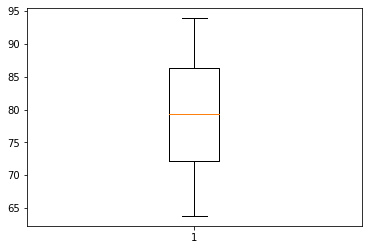

In [12]:
y = list(dt.literacy_rate)
plt.boxplot(y)
plt.show()

C:\Users\avuda\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'Jammu And Kashmir'),
  Text(1, 0, 'Himachal Pradesh'),
  Text(2, 0, 'Punjab'),
  Text(3, 0, 'Chandigarh'),
  Text(4, 0, 'Uttarakhand'),
  Text(5, 0, 'Haryana'),
  Text(6, 0, 'Delhi                         '),
  Text(7, 0, 'Rajasthan                     '),
  Text(8, 0, 'Uttar Pradesh'),
  Text(9, 0, 'Bihar'),
  Text(10, 0, 'Sikkim'),
  Text(11, 0, 'Arunachal Pradesh'),
  Text(12, 0, 'Nagaland'),
  Text(13, 0, 'Manipur'),
  Text(14, 0, 'Mizoram                       '),
  Text(15, 0, 'Tripura'),
  Text(16, 0, 'Meghalaya                     '),
  Text(17, 0, 'Assam'),
  Text(18, 0, 'West Bengal                   '),
  Text(19, 0, 'Jharkhand'),
  Text(20, 0, 'Odisha'),
  Text(21, 0, 'Chhattisgarh'),
  Text(22, 0, 'MADHYA PRADESH'),
  Text(23, 0, 'Gujarat'),
  Text(24, 0, 'Daman & Diu                   '),
  Text

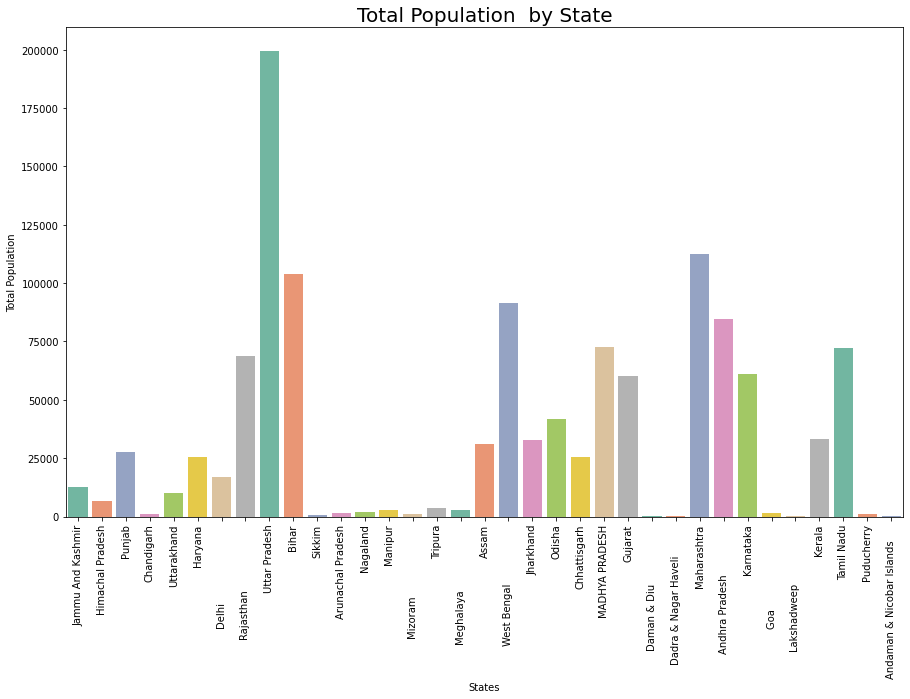

In [13]:
fig, ax1 = plt.subplots()
fig.set_size_inches(15,  9)
x=dt["statname"]
y=dt["tot_population"]
ax1 = sns.barplot(x, y,palette ="Set2")
ax1.set(xlabel ='States', ylabel ='Total Population')
ax1.set_title('Total Population  by State', size = 20)
plt.xticks(rotation =90)
  

In [14]:
dt1=pd.read_csv("D:/heatmap.csv")

In [15]:
num=dt1.describe(include=['int','float']).columns

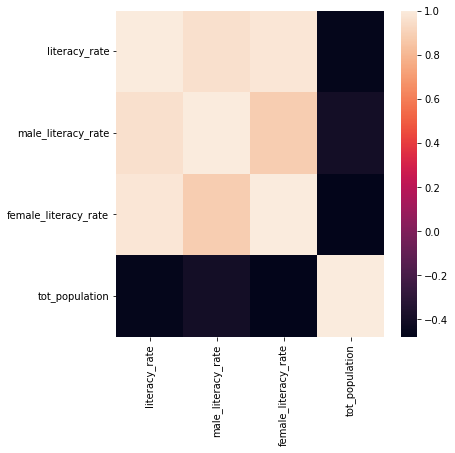

In [16]:
plt.figure(figsize=(6,6))
sb.heatmap(dt1.corr())
plt.show()

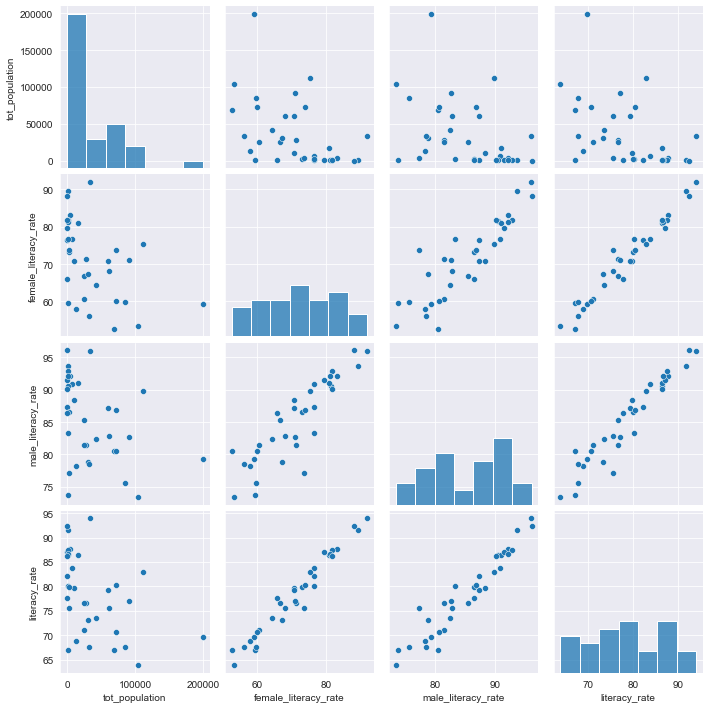

In [17]:
sb.set_style('darkgrid')
sb.pairplot(dt[['tot_population','female_literacy_rate','male_literacy_rate','literacy_rate']])
pl.show()

In [18]:
ab= {'x1':dt.iloc[:,11],'x2':dt.iloc[:,12],'x3':dt.iloc[:,3],'y':dt.iloc[:,10]}
df=pd.DataFrame(ab)
df

,x1,x2,x3,y
0,78.26,58.01,222236,68.74
1,90.83,76.60,55673,83.78
2,81.48,71.34,50362,76.68
3,90.54,81.38,114,86.43
4,88.33,70.70,53483,79.63
5,85.38,66.77,44212,76.64
6,91.03,80.93,1483,86.34
7,80.51,52.66,342239,67.06
8,79.24,59.26,240928,69.72
9,73.39,53.33,94163,63.82


# SIMPLE LINEAR REGRESSION

In [19]:
y=dt['literacy_rate'].values
x=dt['female_literacy_rate'].values

In [20]:
def regression(x,y):
    n=len(x)
    xbar=sum(x)/len(x)
    ybar=sum(y)/len(y)
    product=[]
    productx=[]
    for num1,num2 in zip(x,y):
        product.append(num1*num2)
        productx.append(num1*num1)
    sumx=sum(productx)
    sumxy=sum(product)
    b1=((sumxy)-(n*xbar*ybar))/((sumx)-(n*xbar*xbar))
    print("The value of b1 is:",b1)
    b0=((ybar)-(b1*xbar))
    print("The value of b0 is:",b0)
    predy=[]
    tss=[]
    sse=[]
  
    for i in range(n):
        predy.append(b0+b1*x[i])
        tss.append((y[i]-ybar)**2)
        sse.append((y[i]-predy[i])**2)
    SSE=sum(sse)
    TSS=sum(tss)
    r2=1-(SSE/TSS)
    RMSE = ((SSE/n)**(0.5))
    print("Root Mean Square Error:")
    print(RMSE)
    print("The value of r2 is:",r2)
    x_max = np.max(x) + 40
    x_min = np.min(x) - 40
    X = np.linspace(x_min, x_max, 1000)
    Y = b0 + b1 * X
    plt.plot(X, Y, color = 'blue',linestyle = 'dashed',  label='Regression Line')
    plt.scatter(x, y, color = 'maroon', alpha = 0.7, edgecolors = "black", label='Scatter Plot')
    plt.xlabel('urban_population')
    plt.ylabel('literacy_rate')
    plt.title('female_literacy_rate vs literacy_rate')
    plt.legend()
    plt.show()


The value of b1 is: 0.758573017542834
The value of b0 is: 24.43537746025374
Root Mean Square Error:
1.6047956028681127
The value of r2 is: 0.9598019492081398


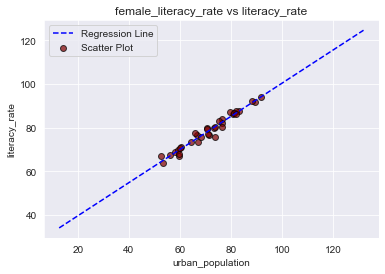

In [21]:
a=regression(x,y)

# MULTIPLE LINEAR REGRESSION

In [22]:
class income:
    def __init__(self):
        self.lst = []

    def mean(self, data):
        return (sum(data) / len(data))

    def Prediction(self, x, y, x1, x2, x3):
        arx = np.array(x)
        #print(arx)
        artx = arx.T
        ary = np.array(y)
        fst = np.linalg.inv(np.dot(artx, arx))
        sec = np.dot(artx, ary)
        res = np.dot(fst, sec)
        b0 = self.mean(y) - (self.mean(x1) * res[0]) - (self.mean(x2) * res[1]) - (self.mean(x3) * res[2])
        print("Regression Equation: Y = ",b0,"+",res[0],"x1 +",res[1],"x2 +",res[2],"x3")
        print("Enter the independent variables required to predict the literacy rate:")
        print("Enter the Female Literacy Rate to predict the Total Literacy Rate")
        X1=int(input())
        print("Enter the male Literacy Rate to predict the Total Literacy Rate")
        X2=int(input())
        print("Enter the Total Population to predict the Literacy Rate")
        X3=int(input())
        Y=b0+res[0]*X1 +res[1]*X2 +res[2]*X3
        print("The predited value is:",Y)
        y_predict=[]
        ss_total=[]
        ss_res=[]
        for i in range(len(x1)):
            y_predict.append(b0 + res[0]*x1[i] + res[1]*x2[i] + res[2]*x3[i]) 
            ss_total.append((y[i] - self.mean(y)) ** 2)
            ss_res.append((y[i] - y_predict[i]) ** 2)
        sss_res=sum(ss_res)
        sss_total=sum(ss_total)
        r2 = 1 - (sss_res/sss_total)
        print('R2 Score',r2)

In [23]:
a=income()
a.Prediction(df[['x1','x2','x3']],df['y'],df['x1'],df['x2'],df['x3'])

Regression Equation: Y =  -0.001591748073988597 + 0.5356860452494256 x1 + 0.4632485087567293 x2 + -1.4451546201659383e-06 x3
Enter the independent variables required to predict the literacy rate:
Enter the Female Literacy Rate to predict the Total Literacy Rate
98
Enter the male Literacy Rate to predict the Total Literacy Rate
97
Enter the Total Population to predict the Literacy Rate
1000000
The predited value is: 95.98559141560654
R2 Score 0.9984888742986334
